In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from useful_tools import ModelTester

In [98]:
with open('../datasets/data/steak-survey/steak-risk-survey.csv') as infile:
    data = pd.read_csv(infile)
data.drop(['RespondentID'], axis=1, inplace=True)
data.drop([0], inplace=True)
data.columns = ['risky_lottery', 'smoking', 'drinking', 'gambling', 'skydiving', 'speeding', 'cheating', 'steak', 'steak_prep', 'male', 'age', 'income', 'education', 'location']
data['male'] = (data['male'] == 'Male').astype(int) 
data.dropna(inplace=True)
data['risky_lottery'] = (data['risky_lottery'] == 'Lottery A').astype(int)
for name in ['smoking', 'drinking', 'gambling', 'skydiving', 'speeding', 'cheating', 'steak']:
    data[name] = (data[name] == 'Yes').astype(int)
    
data['steak_prep'] = data['steak_prep'].map({'Rare': 0, 'Medium rare': 1, 'Medium': 2, 'Medium Well': 3, 'Well': 4})
data['age'] = data['age'].map({'18-29': 0, '30-44': 1, '45-60': 2, '> 60': 3})
data['education'] = data['education'].map({'Less than high school degree': 0,
                                          'High school degree': 1,
                                          'Some college or Associate degree': 2,
                                          'Bachelor degree': 3,
                                          'Graduate degree':4})
data['income'] = data['income'].map({'$0 - $24,999': 0,
                                     '$100,000 - $149,999': 3,
                                     '$150,000+': 4,
                                     '$25,000 - $49,999': 1,
                                     '$50,000 - $99,999': 2})

# This is always 1, because dropping NaN means that the rows where steak_prep is Nan, steak is 0
data.drop(['steak', 'location'], axis=1, inplace=True)
#data = pd.get_dummies(data, columns=['location'])
data.head()

,risky_lottery,smoking,drinking,gambling,skydiving,speeding,cheating,steak_prep,male,age,income,education
2,1,0,1,0,0,0,0,1,1,3,2,2
3,1,0,1,1,0,1,1,0,1,3,4,4
4,0,1,1,1,0,1,1,2,1,3,2,3
5,0,0,1,0,0,1,1,2,1,3,2,4
6,1,0,0,0,0,1,0,1,1,0,0,2


In [99]:
x = data.drop(['risky_lottery'], axis=1)
y = data['risky_lottery']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

tester = ModelTester(x_test, y_test)

In [106]:
tree = DecisionTreeClassifier(min_samples_leaf=5)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Confusion matrix, without normalization


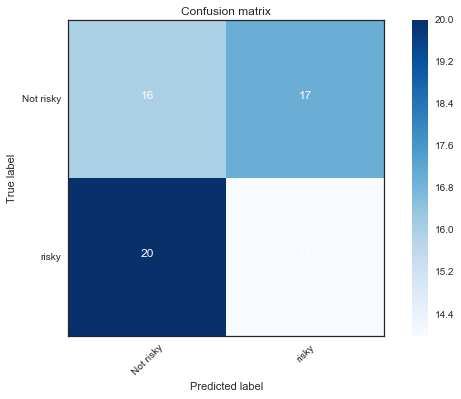

Accuracy:  46.2686567164 %


(array([[16, 17],
        [20, 14]]), 0.46268656716417911)

In [107]:
tester.test_classifier(tree, class_names=('Not risky', 'risky'))